In [4920]:
import pandas as pd
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
from jinja2 import Template

import webbrowser


# import importlib
# import reporting_config

load_dotenv()


from reporting_config import *
from reporting_queries import get_test_count, get_dl_5g_curr_comp, get_network_category_curr_comp, get_test_summary_curr_comp
from reporting_plots import create_facet_grid, plot_with_fallback
from reporting_eom_tables import process_eom_data

# # Reload the module to reflect changes
# importlib.reload(reporting_config)

# # Access the updated variables
# curr_csid = reporting_config.curr_csid
# comp_csid = reporting_config.comp_csid

curr_csid = 12705
comp_csid = 12381

#London
# curr_csid = 12854
# comp_csid = 12265


country = "US"
# country = "UK"

# select * from prod_ms_partitions.test_summary_12854;
# collection_type_id = 5 --> country = UK 11
# select * from prod_ms_partitions.test_summary_12705;
# # collection_type_id = 1 --> country = US  10

# mrss.collection_set_id =(select fn_get_previous_csid::text from analytic.fn_get_previous_csid(12889))::integer


if (country == "US"):
    test_type_id = [19, 20, 26]
    num_col_wrap = 3
    

if (country == "UK"):
    test_type_id = [19, 20]
    num_col_wrap = 4

test_type_id_str = ", ".join(map(str, test_type_id))



# Fetch the data
df_ts_curr, df_ts_comp = get_test_summary_curr_comp(curr_csid, comp_csid)
df_test_count = get_test_count(curr_csid)
df_dl_5g_curr, df_dl_5g_comp = get_dl_5g_curr_comp(curr_csid, comp_csid)
df_network_category_curr, df_network_category_comp = get_network_category_curr_comp(curr_csid, comp_csid)

# # # Data Network Category (Download, Upload, LDRs)
# def plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="graph.png"):
#     pd.set_option('display.max_rows', None)
#     pd.set_option('display.max_columns', None)

#     # Add a column to distinguish between current and comparison data

#     df_dl_5g_curr["product_period"] = df_dl_5g_curr["product_period"]
#     df_dl_5g_comp["product_period"] = df_dl_5g_comp["product_period"]

#     # Combine the two DataFrames
#     df_dl_5g_combined = pd.concat([df_dl_5g_comp,df_dl_5g_curr], ignore_index=True)

#     # Create FacetGrid
#     g = sns.FacetGrid(df_dl_5g_combined, col="carrier", col_wrap=4, height=15, sharey=True)

#     # Map bar plots
#     g.map_dataframe(sns.barplot, x="product_period", y="dl_pct", hue="dl_network",
#                     palette=dl_color_dict, dodge=False, errorbar=None)

#     # Add text labels to bars (only for current data)
#     for ax, (_, subdata) in zip(g.axes.flat, df_dl_5g_curr.groupby("carrier")):
#         for container in ax.containers:
#             for bar in container:
#                 height = bar.get_height()
#                 if height >= 3:
#                     ax.text(bar.get_x() + bar.get_width() / 2., height / 2,
#                             f'{int(height)}%', ha='center', va='center', color='white', fontsize=25)
                

#     # Customize layout
#     g.set_axis_labels("", "Share of DL tests (%)")
#     g.set_titles(col_template="{col_name}")
#     g.fig.subplots_adjust(top=0.85)
#     g.fig.suptitle("DL Network Category", fontsize=35, fontweight='bold')
#     g.add_legend(title="DL Network", bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=3, fontsize=35,)
#     plt.tight_layout()
#     g.savefig(save_path)
#     plt.show()

# plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="dl_net_graph.png")



In [4921]:
# def plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="graph.png"):
#     pd.set_option('display.max_rows', None)
#     pd.set_option('display.max_columns', None)

#     # Ensure the column exists
#     df_dl_5g_curr["product_period"] = df_dl_5g_curr["product_period"]
#     df_dl_5g_comp["product_period"] = df_dl_5g_comp["product_period"]

#     # Combine current and comparison DataFrames
#     df_dl_5g_combined = pd.concat([df_dl_5g_comp, df_dl_5g_curr], ignore_index=True)

#     # Create FacetGrid with larger dimensions and spacing
#     g = sns.FacetGrid(df_dl_5g_combined, col="carrier", col_wrap=4, height=6, aspect=1.2, sharey=True)
    
#     # Increase overall figure size to give more space around the plot
#     g.fig.set_size_inches(12, 10)  # Adjust the figure size (width, height) here

#     # Plot bars
#     g.map_dataframe(sns.barplot, x="product_period", y="dl_pct", hue="dl_network",
#                     palette=dl_color_dict, dodge=False, errorbar=None)

#     # Add labels on bars
#     for ax, (_, subdata) in zip(g.axes.flat, df_dl_5g_curr.groupby("carrier")):
#         for container in ax.containers:
#             for bar in container:
#                 height = bar.get_height()
#                 if height >= 3:
#                     ax.text(bar.get_x() + bar.get_width() / 2., height * 0.5,
#                             f'{int(height)}%', ha='center', va='center',
#                             color='white', fontsize=10, fontweight='bold')

#     # Axis and Title formatting
#     g.set_axis_labels("", "Share of DL tests (%)")
#     g.set_titles(col_template="{col_name}", size=14)
#     g.set_xticklabels(rotation=45, size=10)
#     g.set_ylabels(size=20)

#     # Fix legend formatting
#     g.add_legend(title="DL Network", bbox_to_anchor=(0.5, -0.05), loc='lower center', ncol=3,
#                  title_fontsize=12, fontsize=10)

#     # Overall layout
#     g.fig.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=0.9)
#     g.fig.suptitle("DL Network Category", fontsize=20, fontweight='bold')

#     plt.tight_layout()
#     g.savefig(save_path, dpi=300)
#     plt.show()

# plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="dl_net_graph.png")

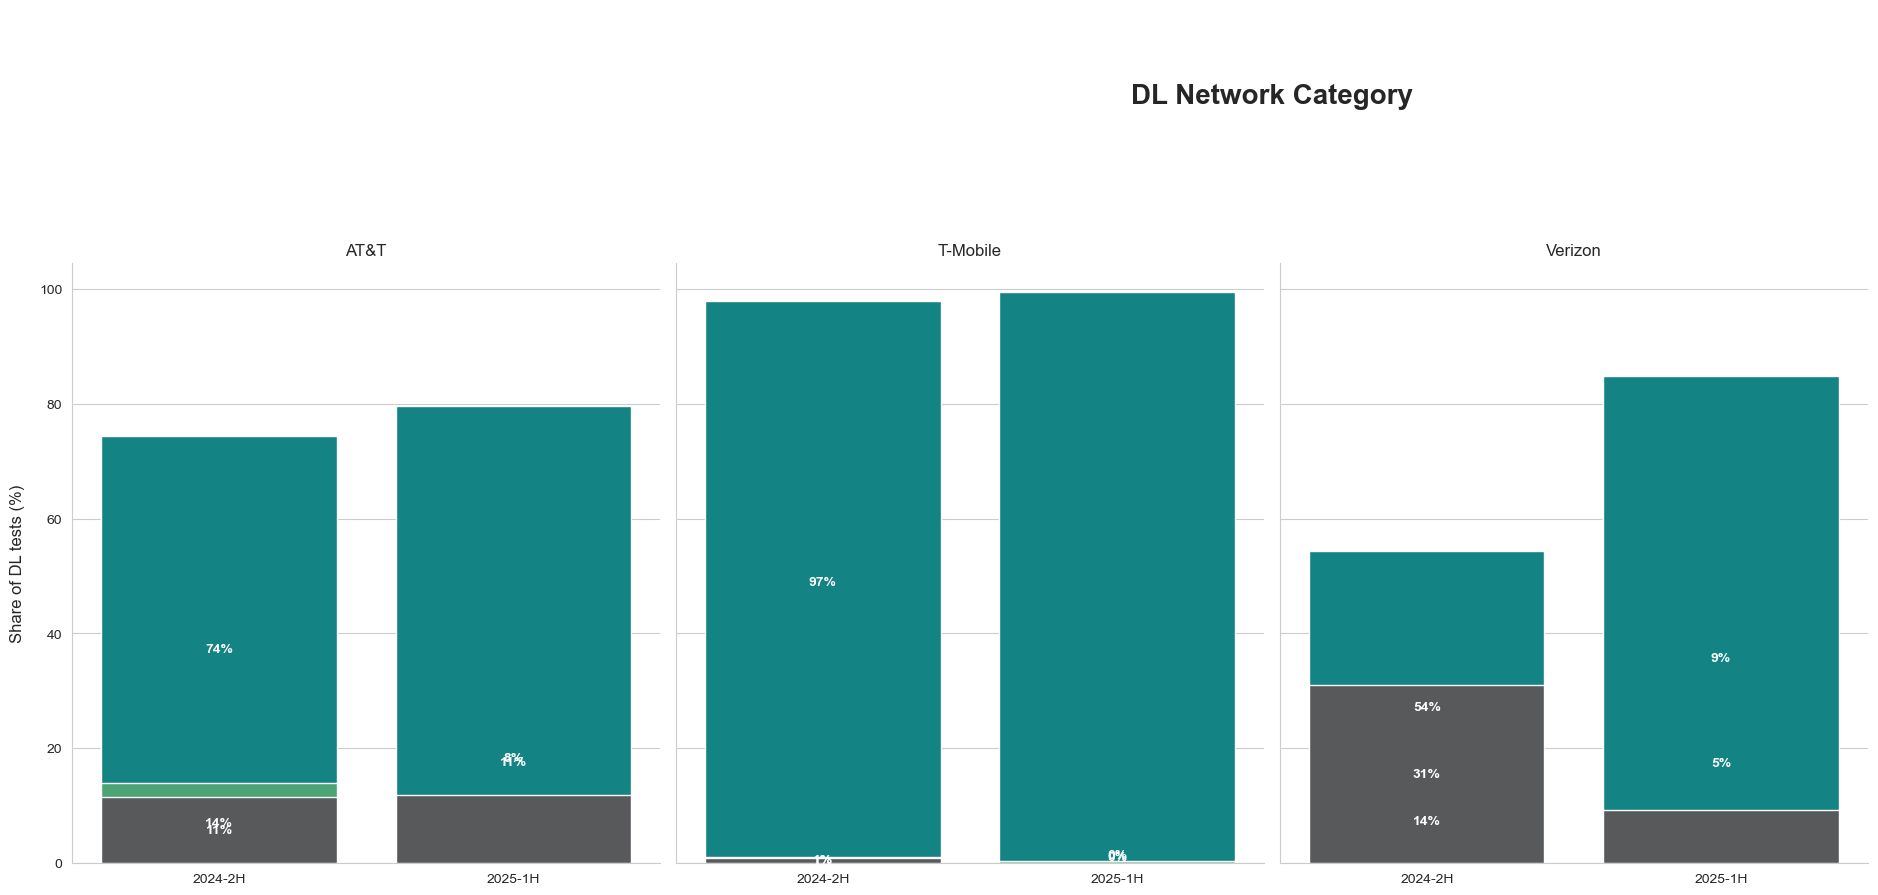

In [4922]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="graph.png"):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Add a column to distinguish between current and comparison data
    df_dl_5g_curr["product_period"] = df_dl_5g_curr["product_period"]
    df_dl_5g_comp["product_period"] = df_dl_5g_comp["product_period"]

    # Combine the two DataFrames
    df_dl_5g_combined = pd.concat([df_dl_5g_comp, df_dl_5g_curr], ignore_index=True)

    # Calculate the total percentage of dl_pct per product_period and normalize
    df_dl_5g_combined['normalized_pct'] = df_dl_5g_combined.groupby(['carrier', 'product_period'])['dl_pct'].transform(lambda x: x / x.sum() * 100)

    # Create a FacetGrid
    g = sns.FacetGrid(df_dl_5g_combined, col="carrier", col_wrap=4, height=5, aspect=1.2)

    # Create a stacked bar plot
    g.map_dataframe(sns.barplot, x="product_period", y="normalized_pct", hue="dl_network",
                    palette=dl_color_dict, dodge=False, errorbar=None)

    # Add text labels to bars (only for current data)
    for ax, (_, subdata) in zip(g.axes.flat, df_dl_5g_curr.groupby("carrier")):
        # Add the text labels at the center of each bar segment
        for container in ax.containers:
            total_height = 0  # Keeps track of the total height to place each label correctly
            for bar in container:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width() / 2., total_height + height / 2,
                            f'{int(height)}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
                    total_height += height  # Accumulate the height for stacked bars

    # Customize layout
    g.set_axis_labels("", "Share of DL tests (%)")
    g.set_titles(col_template="{col_name}", size=12)
    g.fig.suptitle("DL Network Category", fontsize=20, fontweight='bold')
    g.set_ylabels(size=12, labelpad=10)


    # Adjust the figure size to add more space around the plot
    g.fig.set_size_inches(30, 10)

    # Adjust subplots for more white space around the plot
    g.fig.subplots_adjust(top=0.80, bottom=0.2, left=0.1, right=0.9)

    # Save and show
    g.savefig(save_path, dpi=300)
    plt.show()

plot_dl_5g_network_category(df_dl_5g_curr, df_dl_5g_comp, dl_color_dict, save_path="dl_net_graph.png")


In [4923]:
df_dl_5g_curr.head(len(df_dl_5g_curr))

,product_period,carrier,dl_network,count,dl_pct,access_spd,med_tput,max_tput,burst_tput,access,task
0,2025-1H,AT&T,5G,591,79.65,42.0,361.1,1039.5,1226.4,100.0,99.8
1,2025-1H,AT&T,Mixed-5G,63,8.49,45.0,94.8,619.2,926.1,99.7,96.3
2,2025-1H,AT&T,LTE,88,11.86,42.0,17.8,274.6,759.3,96.9,92.3
3,2025-1H,T-Mobile,5G,738,99.46,35.0,456.4,1471.9,1717.9,99.6,99.3
4,2025-1H,T-Mobile,Mixed-5G,3,0.40,42.0,12.6,60.9,164.2,100.0,96.3
5,2025-1H,T-Mobile,LTE,1,0.13,38.0,0.8,0.8,4.0,100.0,77.8
6,2025-1H,Verizon,5G,630,84.91,51.0,210.0,710.7,866.8,100.0,99.9
7,2025-1H,Verizon,Mixed-5G,43,5.80,52.0,84.3,237.1,464.1,100.0,96.4
8,2025-1H,Verizon,LTE,69,9.30,58.0,49.4,117.6,198.9,100.0,100.0


Data Network Category filtered and reshape by network type

In [4924]:
# Combine the current and comparison DataFrames
df_network_category_combined = pd.concat([df_network_category_curr, df_network_category_comp], ignore_index=True)

# Reshape the DataFrame
df_network_category_reshaped = df_network_category_combined.pivot_table(
    index=["product_period", "carrier"], 
    columns="network", 
    values="percent"
).reset_index()

# Remove the column index name
df_network_category_reshaped.columns.name = None  

# Sort by 'carrier'
df_network_category_reshaped = df_network_category_reshaped.sort_values(by="carrier").reset_index(drop=True)

# Reorder  the columns
df_network_category_reshaped = df_network_category_reshaped[['product_period', 'carrier', '5G', 'Mixed-5G', 'LTE']]

# Display the entire DataFrame
df_network_category_reshaped.head(len(df_network_category_reshaped))

,product_period,carrier,5G,Mixed-5G,LTE
0,2024-2H,AT&T,35.9,9.9,54.3
1,2025-1H,AT&T,59.1,7.7,33.2
2,2024-2H,T-Mobile,97.5,1.7,0.9
3,2025-1H,T-Mobile,99.5,0.4,0.1
4,2024-2H,Verizon,37.2,15.4,47.4
5,2025-1H,Verizon,75.0,5.7,19.3


 Download Network Technology

In [4925]:
dl_lte_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
dl_lte_curr['start_date'] = pd.to_datetime(dl_lte_curr['local_time']).dt.date

dl_lte_comp = df_ts_comp [df_ts_comp ['test_type_id'] == 20]
dl_lte_comp['start_date'] = pd.to_datetime(dl_lte_comp['local_time']).dt.date


filtered_net_type_curr = (
    dl_lte_curr['net_types'].isin([262144, 4194304, 4456448]) & 
    dl_lte_curr['net_types_desc'].isin(["LTE", "Mixed", "5G", "NR", "LTE,NR"]))
   
filtered_net_type_comp = (
    dl_lte_comp['net_types'].isin([262144, 4194304, 4456448]) & 
    dl_lte_comp['net_types_desc'].isin(["LTE", "Mixed", "5G", "NR", "LTE,NR"])
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/1111104769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_lte_curr['start_date'] = pd.to_datetime(dl_lte_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/1111104769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dl_lte_comp['start_date'] = pd.to_datetime(dl_lte_comp['local_time']).dt.date


 DL LTE market Daily

Current:

In [4926]:
lte_1 = (
    dl_lte_curr[filtered_net_type_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='lte_count') 
)

lte_2 = (
    dl_lte_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_curr = pd.merge(lte_1, lte_2, on=['carrier', 'start_date'], how='left').fillna(0)

lte_curr['lte_pct'] = round((lte_curr['lte_count'] / lte_curr['total_tests']) * 100, 2)

# lte_curr.head()

Comparison:

In [4927]:
lte_3 = (
    dl_lte_comp[filtered_net_type_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='lte_count') 
)

lte_4 = (
    dl_lte_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_comp = pd.merge(lte_3, lte_4, on=['carrier', 'start_date'], how='left').fillna(0)

lte_comp['lte_pct'] = round((lte_comp['lte_count'] / lte_comp['total_tests']) * 100, 2)

# lte_comp.head()

DL LTE Overall

Current:

In [4928]:
lte_5 = (
    dl_lte_curr[filtered_net_type_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='lte_count')
)

lte_6 = (
    dl_lte_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_all_curr = pd.merge(lte_5, lte_6, on=['carrier'], how='left').fillna(0)

lte_all_curr['mean_LTE_curr'] = round((lte_all_curr['lte_count'] / lte_all_curr['total_tests']) * 100, 2)

# lte_all_curr.head()

Comparison:

In [4929]:
lte_7 = (
    dl_lte_comp[filtered_net_type_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='lte_count')
)

lte_8 = (
    dl_lte_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

lte_all_comp = pd.merge(lte_7, lte_8, on=['carrier'], how='left').fillna(0)

lte_all_comp['mean_LTE_comp'] = round((lte_all_comp['lte_count'] / lte_all_comp['total_tests']) * 100, 2)

# lte_all_comp.head()

PLOT GRAPH

In [4930]:
# Define the create_facet_grid function
def create_facet_grid(data, y_col, num_col_wrap, mean_curr_vals, mean_comp_vals, 
                      y_label, title, min_vals=None, max_vals=None, ylim=None, save_path="graph.png"):    
   
   g = sns.FacetGrid(
        data,
        col="carrier",
        col_wrap=num_col_wrap,
        height=4,
        sharey=True
    )

    # Pass y_col and other arguments as keyword arguments
   g.map_dataframe(
        plot_with_fallback,
        y_col=y_col,
        mean_curr_vals=mean_curr_vals,
        mean_comp_vals=mean_comp_vals,
        min_vals=min_vals,
        max_vals=max_vals,
        color=None
    )

    # Calculate the maximum value for the y-axis
   max_value = data[y_col].max()

    # Calculate the default maximum value for the y-axis if ylim is not provided
   if ylim is None:
        max_value = data[y_col].max()
        if max_value < 6:
            ylim = (0, max_value + 2)  
        else:
            ylim = (0, max_value + 20)  

    # Customize the grid
   g.set_titles(col_template="{col_name}")
   g.set_axis_labels("", y_label)
   g.set(ylim=ylim)

# Adjust the x-axis tick labels (dates)
   for ax in g.axes.flat:
        ax.tick_params(axis='x', labelsize=8)  
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  

   plt.subplots_adjust(top=0.9)
   g.fig.suptitle(title, fontsize=18, fontweight="bold")

    # Create custom legend handles
   import matplotlib.lines as mlines
   mean_curr_line = mlines.Line2D([], [], color='blue', linewidth=2, label='Mean of current daily values')
   mean_comp_line = mlines.Line2D([], [], color='yellow', linewidth=2, label='Mean of previous daily values')
   legend_handles = [mean_curr_line, mean_comp_line]
    
   if min_vals is not None:
        min_comp_line = mlines.Line2D([], [], color='#686868', linewidth=1, linestyle='dashed', label='Min of previous daily values')
        legend_handles.append(min_comp_line)

   if max_vals is not None:
        max_comp_line = mlines.Line2D([], [], color='green', linewidth=1, linestyle='dashed', label='Max of previous daily values')
        legend_handles.append(max_comp_line)

    # Add to the figure legend (not individual subplots)
   g.add_legend()  
   g.fig.legend(
        handles=legend_handles,
        loc='upper right',
        bbox_to_anchor=(0.99, 0.99),
        fontsize=6,
        frameon=True,
        edgecolor='black'
    )
   plt.tight_layout()
   g.savefig(save_path)
   plt.show()

# Define the plot_with_fallback function
def plot_with_fallback(data, y_col, mean_curr_vals, mean_comp_vals, color, min_vals=None, max_vals=None, **kwargs):
    import matplotlib.pyplot as plt

    # Get the carrier for the current facet
    carrier = data['carrier'].iloc[0]  

    sns.set_style("whitegrid")
    plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

    # Plot the line for daily LTE percentage
    sns.lineplot(
        data=data,
        x="start_date",
        y=y_col,  
        marker="o",
        color=carrier_color_dict_reporting.get(carrier, "gray"),
        linewidth=3,
        markersize=10,
        **kwargs
    )

    # Add summary lines
    if carrier in mean_curr_vals:
        mean_curr = mean_curr_vals[carrier]
        plt.axhline(
            y=mean_curr,
            color="blue",
            linewidth=2,
            linestyle="-"
        )

    if carrier in mean_comp_vals:
        mean_comp = mean_comp_vals[carrier]
        plt.axhline(
            y=mean_comp,
            color="yellow",
            linewidth=2,
            linestyle="-"
        )

    if min_vals is not None and carrier in min_vals:
        min_val = min_vals[carrier]
        plt.axhline(
            y=min_val,
            color="#686868",
            linewidth=1,
            linestyle="dashed"
        )
    
    if max_vals is not None and carrier in max_vals:
        max_val = max_vals[carrier]
        plt.axhline(
            y=max_val,
            color="green",
            linewidth=1,
            linestyle="dashed"
        )

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


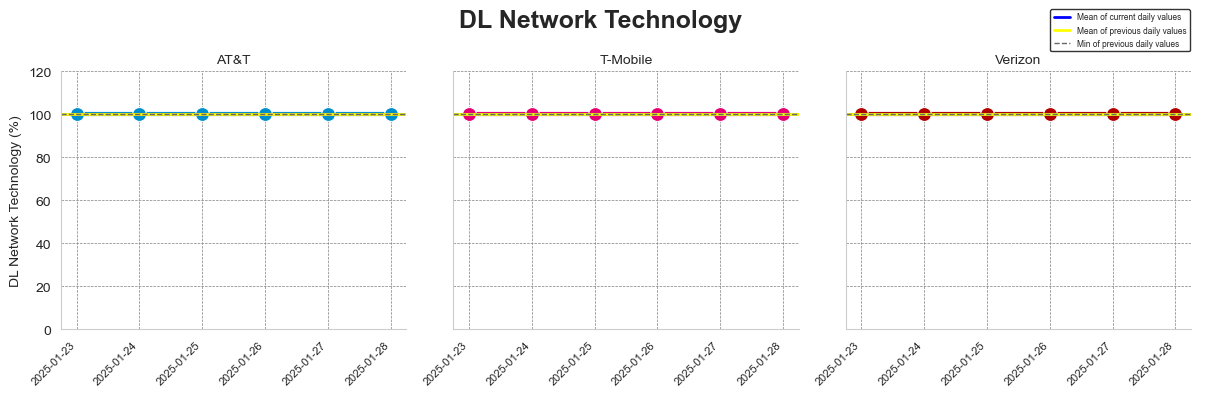

In [4931]:
# Prepare the data for the function call
mean_curr_vals = lte_all_curr.groupby('carrier')['mean_LTE_curr'].mean().to_dict()
mean_comp_vals = lte_all_comp.groupby('carrier')['mean_LTE_comp'].mean().to_dict()
min_vals = lte_comp.groupby('carrier')['lte_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=lte_curr,
    y_col="lte_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    min_vals=min_vals,
    max_vals=None,
    title="DL Network Technology",
    y_label="DL Network Technology (%)",
    # save_path="lte_graph.png"
)


Compute the EOM table

In [4932]:
curr_test = lte_all_curr
comp_test = lte_all_comp
on_column = 'carrier'
drop_columns = ['lte_count_x', 'lte_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'DL Network Technology (%)'
curr_col = 'mean_LTE_curr'
comp_col = 'mean_LTE_comp'

# Process the data
lte_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
lte_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Network Technology (%),AT&T,100.0,100.0,0.0,0.0
1,DL Network Technology (%),T-Mobile,100.0,100.0,0.0,0.0
2,DL Network Technology (%),Verizon,100.0,100.0,0.0,0.0


M2M VoLTE/VoNR/EPS Fallback

In [4933]:
call_data_curr = df_ts_curr[df_ts_curr['test_type_id'] == 23]
call_data_curr['start_date'] = pd.to_datetime(call_data_curr['local_time']).dt.date

filtered_call_net_type_curr = (
    call_data_curr['call_network_type'].isin(["VoLTE", "EPS Fallback", "VoNR"]) 
)

call_data_comp = df_ts_comp[df_ts_comp['test_type_id'] == 23]
call_data_comp['start_date'] = pd.to_datetime(call_data_comp['local_time']).dt.date

filtered_call_net_type_comp = (
    call_data_comp['call_network_type'].isin(["VoLTE", "EPS Fallback", "VoNR"]) 
)
# call_data_curr.head()

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/4060893198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['start_date'] = pd.to_datetime(call_data_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/4060893198.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_comp['start_date'] = pd.to_datetime(call_data_comp['local_time']).dt.date


Current VoLTE:

In [4934]:
volte_1 = (
    call_data_curr[filtered_call_net_type_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_2 = (
    call_data_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

volte_curr = pd.merge(volte_1, volte_2, on=['carrier', 'start_date'], how='left').fillna(0)

volte_curr['volte_pct'] = round((volte_curr['volte_count'] / volte_curr['total_tests']) * 100, 2)

# volte_curr.head()

Comparison VoLTE:

In [4935]:
volte_3 = (
    call_data_comp[filtered_call_net_type_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_4 = (
    call_data_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

volte_comp = pd.merge(volte_3, volte_4, on=['carrier', 'start_date'], how='left').fillna(0)

volte_comp['volte_pct'] = round((volte_comp['volte_count'] / volte_comp['total_tests']) * 100, 2)

# volte_comp.head()

DL LTE Overall

Current:

In [4936]:
volte_5 = (
    call_data_curr[filtered_call_net_type_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_6 = (
    call_data_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

volte_all_curr = pd.merge(volte_5, volte_6, on=['carrier'], how='left').fillna(0)

volte_all_curr['mean_voLTE_curr'] = round((volte_all_curr['volte_count'] / volte_all_curr['total_tests']) * 100, 2)

# volte_all_curr.head()

Comparison:

In [4937]:
volte_7 = (
    call_data_comp[filtered_call_net_type_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='volte_count')
)

volte_8 = (
    call_data_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')  
)

volte_all_comp = pd.merge(volte_7, volte_8, on=['carrier'], how='left').fillna(0)

volte_all_comp['mean_voLTE_comp'] = round((volte_all_comp['volte_count'] / volte_all_comp['total_tests']) * 100, 2)

# volte_all_comp.head()

PLOT GRAPH

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


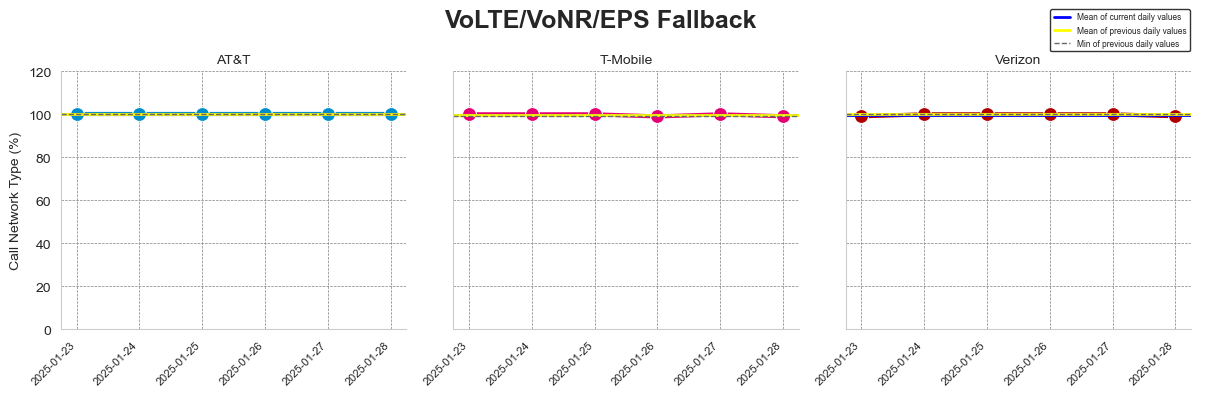

In [4938]:
# Prepare the data for the function call
mean_curr_vals = volte_all_curr.groupby('carrier')['mean_voLTE_curr'].mean().to_dict()
mean_comp_vals = volte_all_comp.groupby('carrier')['mean_voLTE_comp'].mean().to_dict()
min_vals = volte_comp.groupby('carrier')['volte_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=volte_curr,
    y_col="volte_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    min_vals=min_vals,
    max_vals=None,
    title="VoLTE/VoNR/EPS Fallback",
    y_label="Call Network Type (%)",
    save_path="volte_graph.png"
)

compute the EOM table

In [4939]:
curr_test = volte_all_curr
comp_test = volte_all_comp
on_column = 'carrier'
drop_columns = ['volte_count_x', 'volte_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'Call Network Type (%)'
curr_col = 'mean_voLTE_curr'
comp_col = 'mean_voLTE_comp'

# Process the data
volte_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
volte_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,Call Network Type (%),AT&T,100.00,100.00,0.00,0.00
1,Call Network Type (%),T-Mobile,99.69,99.68,0.01,0.01
2,Call Network Type (%),Verizon,99.69,100.00,-0.31,-0.31


    Mobile-to-Mobile Call Block

In [4940]:
call_data_curr['blocked_call'] = 0
mask =(call_data_curr['flag_access_success'] == False)
call_data_curr.loc[mask, 'blocked_call'] = 1

filtered_call_block_curr = (
    call_data_curr['blocked_call'] == 1
)

call_data_comp['blocked_call'] = 0
mask =(call_data_comp['flag_access_success'] == False)
call_data_comp.loc[mask, 'blocked_call'] = 1

filtered_call_block_comp = (
    call_data_comp['blocked_call'] == 1
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2479447700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['blocked_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2479447700.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_comp['blocked_call'] = 0


M2M Block Rate Current market Daily

In [4941]:
blk_1 = (
    call_data_curr[filtered_call_block_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_2 = (
    call_data_curr
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_curr = pd.merge(blk_1, blk_2, on=['carrier', 'start_date'], how='right').fillna(0)

block_curr['block_pct'] = round((block_curr['block_count'] / block_curr['total_tests']) * 100, 2)

block_curr = block_curr[['carrier', 'start_date', 'block_count', 'total_tests', 'block_pct']]

# block_curr.head(len(block_curr))

M2M Block Rate Comparison market Daily

In [4942]:
blk_3 = (
    call_data_comp[filtered_call_block_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_4 = (
    call_data_comp
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_comp = pd.merge(blk_3, blk_4, on=['carrier', 'start_date'], how='right').fillna(0)

block_comp['block_pct'] = round((block_comp['block_count'] / block_comp['total_tests']) * 100, 2)

block_comp = block_comp[['carrier', 'start_date', 'block_count', 'total_tests', 'block_pct']]

# block_comp.head()

  M2M Block Rate Overall

Current:

In [4943]:
blk_5 = (
    call_data_curr[filtered_call_block_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_6 = (
    call_data_curr
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_all_curr = pd.merge(blk_5, blk_6, on=['carrier'], how='right').fillna(0)

block_all_curr['block_rate_curr'] = round((block_all_curr['block_count'] / block_all_curr['total_tests']) * 100, 2)
# Reorder the columns
block_all_curr = block_all_curr[['carrier', 'block_count', 'total_tests', 'block_rate_curr']]

# block_all_curr.head()

Comparison:

In [4944]:
blk_7 = (
    call_data_comp[filtered_call_block_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='block_count')
)

blk_8 = (
    call_data_comp
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

block_all_comp = pd.merge(blk_7, blk_8, on=['carrier'], how='right').fillna(0)

block_all_comp['block_rate_comp'] = round((block_all_comp['block_count'] / block_all_comp['total_tests']) * 100, 2)
# Reorder the columns
block_all_comp = block_all_comp[['carrier', 'block_count', 'total_tests', 'block_rate_comp']]

# block_all_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


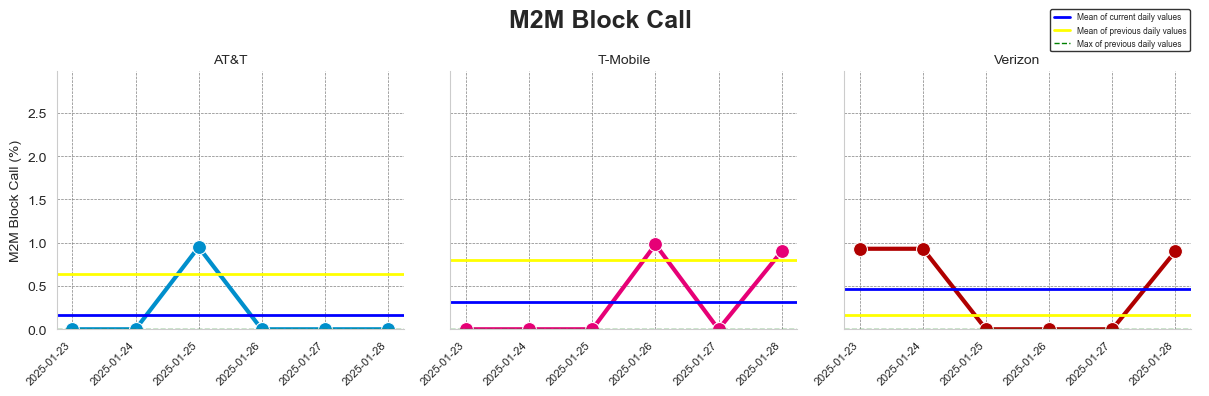

In [4945]:
# Prepare the data for the function call
mean_curr_vals = block_all_curr.groupby('carrier')['block_rate_curr'].mean().to_dict()
mean_comp_vals = block_all_comp.groupby('carrier')['block_rate_comp'].mean().to_dict()
max_vals = block_comp.groupby('carrier')['block_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=block_curr,
    y_col="block_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=max_vals,
    min_vals=None,
    title="M2M Block Call",
    y_label="M2M Block Call (%)",
    save_path="block_graph.png"
)

Compute EOM table

In [4946]:
curr_test = block_all_curr
comp_test = block_all_comp
on_column = 'carrier'
drop_columns = ['block_count_x', 'block_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'M2M Blocked Call (%)'
curr_col = 'block_rate_curr'
comp_col = 'block_rate_comp'

# Process the data
block_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
block_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,M2M Blocked Call (%),AT&T,0.16,0.64,-0.48,-75.00
1,M2M Blocked Call (%),T-Mobile,0.31,0.80,-0.49,-61.25
2,M2M Blocked Call (%),Verizon,0.47,0.16,0.31,193.75


 Mobile-to-Mobile Call Drop

In [4947]:
call_data_curr['blocked_call'] = 0
mask =(call_data_curr['flag_access_success'] == False)
call_data_curr.loc[mask, 'blocked_call'] = 1

call_data_curr['dropped_call'] = 0
mask = (call_data_curr['flag_task_success'] == False)
call_data_curr.loc[mask, 'dropped_call'] = 1

call_data_curr['incomplete_call'] = 0
mask = (call_data_curr['flag_access_success'] == True) & \
       (call_data_curr['flag_task_success'] == None)
call_data_curr.loc[mask, 'incomplete_call'] = 1

# filter curr
filtered_call_drop_curr = (
    call_data_curr['dropped_call'] == 1
)

filtered_call_not_block_curr = (
    call_data_curr['blocked_call'] != 1
)

filtered_call_not_incomplete_curr = (
    call_data_curr['incomplete_call'] != 1
)

#comparison data

call_data_comp['blocked_call'] = 0
mask =(call_data_comp['flag_access_success'] == False)
call_data_comp.loc[mask, 'blocked_call'] = 1


call_data_comp['dropped_call'] = 0
mask = (call_data_comp['flag_task_success'] == False)
call_data_comp.loc[mask, 'dropped_call'] = 1

call_data_comp['incomplete_call'] = 0
mask = (call_data_comp['flag_access_success'] == True) & \
       (call_data_comp['flag_task_success'] == None)
call_data_comp.loc[mask, 'incomplete_call'] = 1

# filter comp
filtered_call_drop_comp = (
    call_data_comp['dropped_call'] == 1
)

filtered_call_not_block_comp = (
    call_data_comp['blocked_call'] != 1
)

filtered_call_not_incomplete_comp = (
    call_data_comp['incomplete_call'] != 1
)

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/338905326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['blocked_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/338905326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  call_data_curr['dropped_call'] = 0
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/338905326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

Current:

In [4948]:
drop_1 = (
    call_data_curr[filtered_call_drop_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_2 = (
    call_data_curr[filtered_call_not_block_curr & filtered_call_not_incomplete_curr]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_curr = pd.merge(drop_1, drop_2, on=['carrier', 'start_date'], how='right').fillna(0)

drop_curr['drop_pct'] = round((drop_curr['drop_count'] / drop_curr['total_tests']) * 100, 2)

drop_curr = drop_curr[['carrier', 'start_date', 'drop_count', 'total_tests', 'drop_pct']]

# drop_curr.head()

Comparison:

In [4949]:
drop_3 = (
    call_data_comp[filtered_call_drop_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_4 = (
    call_data_comp[filtered_call_not_block_comp & filtered_call_not_incomplete_comp]
    .groupby(['carrier', 'start_date'], dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_comp = pd.merge(drop_3, drop_4, on=['carrier', 'start_date'], how='right').fillna(0)

drop_comp['drop_pct'] = round((drop_comp['drop_count'] / drop_comp['total_tests']) * 100, 2)

drop_comp = drop_comp[['carrier', 'start_date', 'drop_count', 'total_tests', 'drop_pct']]

# drop_comp.head()

 M2M drop Rate Comparison market Overall

Current:

In [4950]:
drop_5 = (
    call_data_curr[filtered_call_drop_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_6 = (
    call_data_curr[filtered_call_not_block_curr & filtered_call_not_incomplete_curr]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_all_curr = pd.merge(drop_5, drop_6, on=['carrier'], how='right').fillna(0)

drop_all_curr['drop_rate_curr'] = round((drop_all_curr['drop_count'] / drop_all_curr['total_tests']) * 100, 2)

# Reorder the columns
drop_all_curr = drop_all_curr[['carrier', 'drop_count', 'total_tests', 'drop_rate_curr']]

# drop_all_curr.head()

Comparison

In [4951]:
drop_7 = (
    call_data_comp[filtered_call_drop_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='drop_count')
)

drop_8 = (
    call_data_comp[filtered_call_not_block_comp & filtered_call_not_incomplete_comp]
    .groupby('carrier', dropna=False)
    .size()
    .reset_index(name='total_tests')
)

drop_all_comp = pd.merge(drop_7, drop_8, on=['carrier'], how='right').fillna(0)

drop_all_comp['drop_rate_comp'] = round((drop_all_comp['drop_count'] / drop_all_comp['total_tests']) * 100, 2)

# Reorder the columns
drop_all_comp = drop_all_comp[['carrier', 'drop_count', 'total_tests', 'drop_rate_comp']]

# drop_all_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


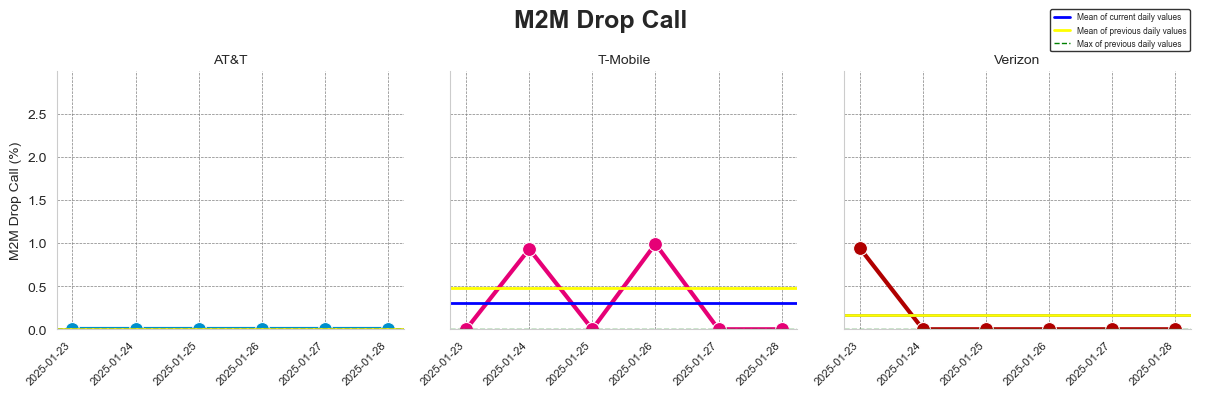

In [4952]:
# Prepare the data for the function call
mean_curr_vals = drop_all_curr.groupby('carrier')['drop_rate_curr'].mean().to_dict()
mean_comp_vals = drop_all_comp.groupby('carrier')['drop_rate_comp'].mean().to_dict()
max_vals = drop_comp.groupby('carrier')['drop_pct'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=drop_curr,
    y_col="drop_pct",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=max_vals,
    min_vals=None,
    title="M2M Drop Call",
    y_label="M2M Drop Call (%)",
    save_path="drop_graph.png"
)

Compute EOM table

In [4953]:
curr_test = drop_all_curr
comp_test = drop_all_comp
on_column = 'carrier'
drop_columns = ['drop_count_x', 'drop_count_y', 'total_tests_x', 'total_tests_y']
measure_name = 'M2M Droped Call (%)'
curr_col = 'drop_rate_curr'
comp_col = 'drop_rate_comp'

# Process the data
drop_rate = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
drop_rate.head()

,measure,carrier,current,comparison,delta,pct_change
0,M2M Droped Call (%),AT&T,0.00,0.00,0.00,NaN
1,M2M Droped Call (%),T-Mobile,0.31,0.48,-0.17,-35.42
2,M2M Droped Call (%),Verizon,0.16,0.16,0.00,0.00


Download Throughput

In [4954]:
##Current
# Filter rows
filtered_dl_tput_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]

# Convert to date
filtered_dl_tput_curr['start_date'] = pd.to_datetime(filtered_dl_tput_curr['local_time']).dt.date

# Convert download speed to Mbps (kbit/s ÷ 1000)
filtered_dl_tput_curr['download_mbps'] = filtered_dl_tput_curr['dsd_effective_download_test_speed'] / 1000

##Comparison:
# Filter rows
filtered_dl_tput_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]

# Convert to date
filtered_dl_tput_comp['start_date'] = pd.to_datetime(filtered_dl_tput_comp['local_time']).dt.date

# Convert download speed to Mbps (kbit/s ÷ 1000)
filtered_dl_tput_comp['download_mbps'] = filtered_dl_tput_comp['dsd_effective_download_test_speed'] / 1000

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/1413940453.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_tput_curr['start_date'] = pd.to_datetime(filtered_dl_tput_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/1413940453.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_tput_curr['download_mbps'] = filtered_dl_tput_curr['dsd_effective_download_test_speed'] / 1000
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ip

Current:

In [4955]:
dl_tput_curr = (
    filtered_dl_tput_curr
    .groupby(['carrier', 'start_date'], as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'median_dl_tput_curr'})
)

dl_tput_curr['median_dl_tput_curr'] = dl_tput_curr['median_dl_tput_curr'].round(2)

# dl_tput_curr.head()

Comparison

In [4956]:
dl_tput_comp = (
    filtered_dl_tput_comp
    .groupby(['carrier', 'start_date'], as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'median_dl_tput_comp'})
)

dl_tput_comp['median_dl_tput_comp'] = dl_tput_comp['median_dl_tput_comp'].round(2)

# dl_tput_comp.head()

Current:

In [4957]:
dl_tput_all_curr = (
    filtered_dl_tput_curr
    .groupby('carrier', as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'dl_tput_curr_line'})
)

dl_tput_all_curr['dl_tput_curr_line'] = dl_tput_all_curr['dl_tput_curr_line'].round(2)

# dl_tput_all_curr.head()

Comparison:

In [4958]:
dl_tput_all_comp = (
    filtered_dl_tput_comp
    .groupby('carrier', as_index=False)['download_mbps']
    .median()
    .rename(columns={'download_mbps': 'dl_tput_comp_line'})
)

dl_tput_all_comp['dl_tput_comp_line'] = dl_tput_all_comp['dl_tput_comp_line'].round(2)

# dl_tput_all_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


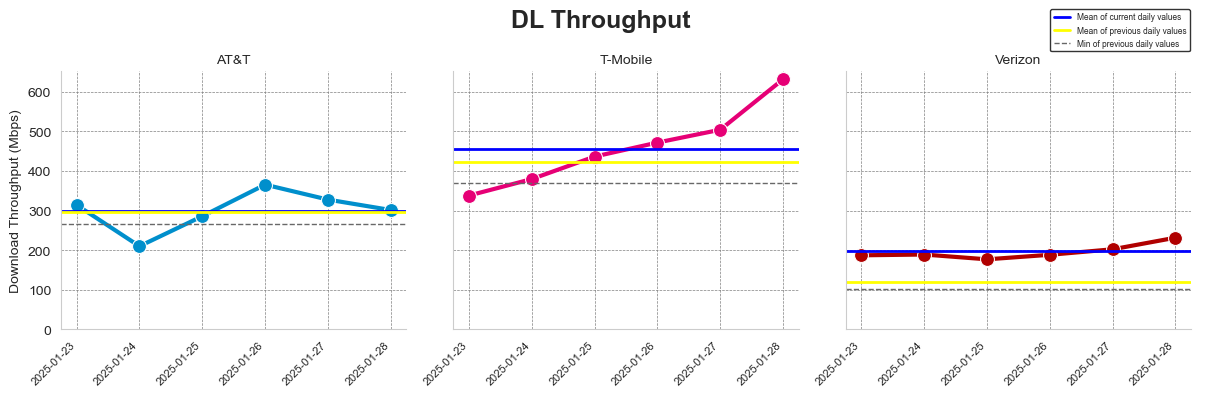

In [4959]:
# Prepare the data for the function call
mean_curr_vals = dl_tput_all_curr.groupby('carrier')['dl_tput_curr_line'].mean().to_dict()
mean_comp_vals = dl_tput_all_comp.groupby('carrier')['dl_tput_comp_line'].mean().to_dict()
min_vals = dl_tput_comp.groupby('carrier')['median_dl_tput_comp'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_tput_curr,
    y_col="median_dl_tput_curr",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    title="DL Throughput",
    y_label="Download Throughput (Mbps)",
    save_path="dl_tput_graph.png"
)

compute EOM table

In [4960]:
curr_test = dl_tput_all_curr
comp_test = dl_tput_all_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Throughput (Mbps)'
curr_col = 'dl_tput_curr_line'
comp_col = 'dl_tput_comp_line'

# Process the data
dl_tput = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_tput.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Throughput (Mbps),AT&T,297.63,296.04,1.59,0.54
1,DL Throughput (Mbps),T-Mobile,454.96,422.64,32.32,7.65
2,DL Throughput (Mbps),Verizon,197.50,119.54,77.96,65.22


Upload Throughput

In [4961]:
filtered_ul_tput_curr = df_ts_curr[df_ts_curr['test_type_id'] == 19]
filtered_ul_tput_curr['start_date'] = pd.to_datetime(filtered_ul_tput_curr['local_time']).dt.date
filtered_ul_tput_curr['upload_mbps'] = filtered_ul_tput_curr['dsu_effective_upload_test_speed'] / 1000

filtered_ul_tput_comp = df_ts_comp[df_ts_comp['test_type_id'] == 19]
filtered_ul_tput_comp['start_date'] = pd.to_datetime(filtered_ul_tput_comp['local_time']).dt.date
filtered_ul_tput_comp['upload_mbps'] = filtered_ul_tput_comp['dsu_effective_upload_test_speed'] / 1000

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2908335583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ul_tput_curr['start_date'] = pd.to_datetime(filtered_ul_tput_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2908335583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ul_tput_curr['upload_mbps'] = filtered_ul_tput_curr['dsu_effective_upload_test_speed'] / 1000
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipyker

Current:

In [4962]:
ul_tput_curr = (
    filtered_ul_tput_curr
    .groupby(['carrier', 'start_date'], as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'median_ul_tput_curr'})
)
ul_tput_curr['median_ul_tput_curr'] = ul_tput_curr['median_ul_tput_curr'].round(2)

# ul_tput_curr.head()

Comparison:

In [4963]:
ul_tput_comp = (
    filtered_ul_tput_comp
    .groupby(['carrier', 'start_date'], as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'median_ul_tput_comp'})
)
ul_tput_comp['median_ul_tput_comp'] = ul_tput_comp['median_ul_tput_comp'].round(2)

# ul_tput_comp.head()

Overall

Current:

In [4964]:
ul_tput_all_curr = (
    filtered_ul_tput_curr
    .groupby('carrier', as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'ul_tput_curr_line'})
)
ul_tput_all_curr['ul_tput_curr_line'] = ul_tput_all_curr['ul_tput_curr_line'].round(2)

# ul_tput_all_curr.head()

Comparison:

In [4965]:
ul_tput_all_comp = (
    filtered_ul_tput_comp
    .groupby('carrier', as_index=False)['upload_mbps']
    .median()
    .rename(columns={'upload_mbps': 'ul_tput_comp_line'})
)
ul_tput_all_comp['ul_tput_comp_line'] = ul_tput_all_comp['ul_tput_comp_line'].round(2)

# ul_tput_all_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


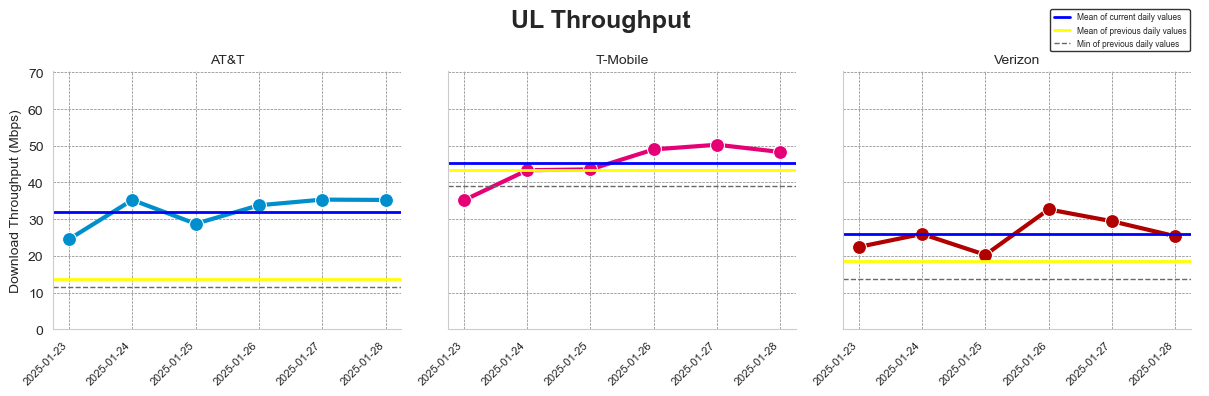

In [4966]:
# Prepare the data for the function call
mean_curr_vals = ul_tput_all_curr.groupby('carrier')['ul_tput_curr_line'].mean().to_dict()
mean_comp_vals = ul_tput_all_comp.groupby('carrier')['ul_tput_comp_line'].mean().to_dict()
min_vals = ul_tput_comp.groupby('carrier')['median_ul_tput_comp'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=ul_tput_curr,
    y_col="median_ul_tput_curr",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    title="UL Throughput",
    y_label="Download Throughput (Mbps)",
    save_path="ul_tput_graph.png"
)

compute EOM table

In [4967]:
curr_test = ul_tput_all_curr
comp_test = ul_tput_all_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'UL Throughput (Mbps)'
curr_col = 'ul_tput_curr_line'
comp_col = 'ul_tput_comp_line'

# Process the data
ul_tput = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
ul_tput.head()

,measure,carrier,current,comparison,delta,pct_change
0,UL Throughput (Mbps),AT&T,32.04,13.76,18.28,132.85
1,UL Throughput (Mbps),T-Mobile,45.35,43.50,1.85,4.25
2,UL Throughput (Mbps),Verizon,25.97,18.65,7.32,39.25


  Download Access Success

In [4968]:
filtered_dl_acc_succ_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
filtered_dl_acc_succ_curr['start_date'] = pd.to_datetime(filtered_dl_acc_succ_curr['local_time']).dt.date
filtered_dl_acc_succ_curr['percentage_access_success'] = filtered_dl_acc_succ_curr['percentage_access_success'] * 100


filtered_dl_acc_succ_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]
filtered_dl_acc_succ_comp['start_date'] = pd.to_datetime(filtered_dl_acc_succ_comp['local_time']).dt.date
filtered_dl_acc_succ_comp['percentage_access_success'] = filtered_dl_acc_succ_comp['percentage_access_success'] * 100

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/3522016850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_acc_succ_curr['start_date'] = pd.to_datetime(filtered_dl_acc_succ_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/3522016850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_acc_succ_curr['percentage_access_success'] = filtered_dl_acc_succ_curr['percentage_access_success'] * 100
/var/folders/bp/rq20yws14k3dmzd9

In [4969]:
dl_acc_curr = (
    filtered_dl_acc_succ_curr
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc'})
)

dl_acc_curr['avg_dl_acc'] = dl_acc_curr['avg_dl_acc'].round(2)

# dl_acc_curr.head()

In [4970]:
dl_acc_comp = (
    filtered_dl_acc_succ_comp
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc'})
)

dl_acc_comp['avg_dl_acc'] = dl_acc_comp['avg_dl_acc'].round(2)

# dl_acc_comp.head()

ALL

Current

In [4971]:
dl_all_acc_curr = (
    filtered_dl_acc_succ_curr
    .groupby('carrier', as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc_curr'})
)

dl_all_acc_curr['avg_dl_acc_curr'] = dl_all_acc_curr['avg_dl_acc_curr'].round(2)

# dl_all_acc_curr.head()

Comparison:

In [4972]:
dl_all_acc_comp = (
    filtered_dl_acc_succ_comp
    .groupby('carrier', as_index=False)['percentage_access_success']
    .mean()
    .rename(columns={'percentage_access_success': 'avg_dl_acc_comp'})
)

dl_all_acc_comp['avg_dl_acc_comp'] = dl_all_acc_comp['avg_dl_acc_comp'].round(2)

# dl_all_acc_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


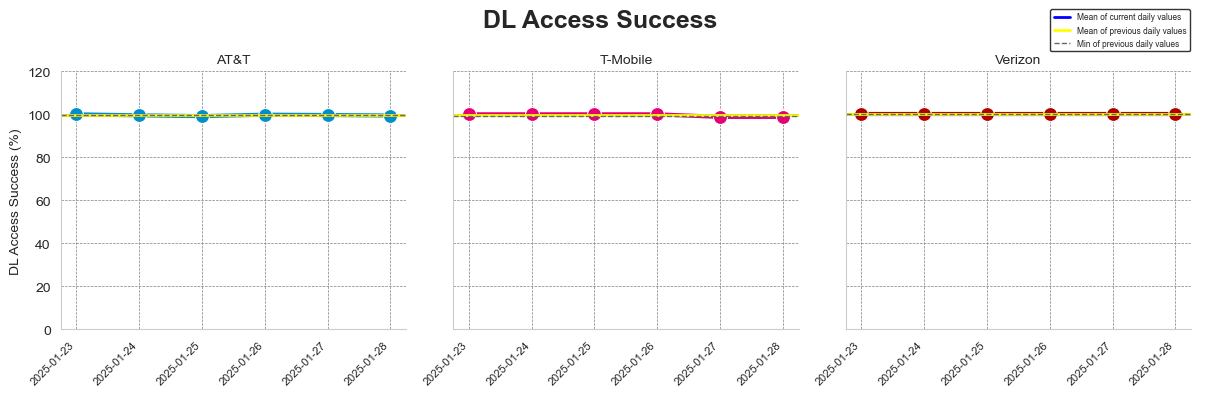

In [4973]:
# Prepare the data for the function call
mean_curr_vals = dl_all_acc_curr.groupby('carrier')['avg_dl_acc_curr'].mean().to_dict()
mean_comp_vals = dl_all_acc_comp.groupby('carrier')['avg_dl_acc_comp'].mean().to_dict()
min_vals = dl_acc_comp.groupby('carrier')['avg_dl_acc'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_acc_curr,
    y_col="avg_dl_acc",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    title="DL Access Success",
    y_label="DL Access Success (%)",
    save_path="dl_acc_graph.png"
)

compute EOM table

In [4974]:
curr_test = dl_all_acc_curr
comp_test = dl_all_acc_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Access Success (%)'
curr_col = 'avg_dl_acc_curr'
comp_col = 'avg_dl_acc_comp'

# Process the data
dl_acc_curr= process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_acc_curr.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Access Success (%),AT&T,99.6,99.74,-0.14,-0.14
1,DL Access Success (%),T-Mobile,99.6,99.81,-0.21,-0.21
2,DL Access Success (%),Verizon,100.0,100.00,0.00,0.00


Download Task Success

In [4975]:
filtered_dl_task_succ_curr = df_ts_curr[df_ts_curr['test_type_id'] == 20]
filtered_dl_task_succ_curr['start_date'] = pd.to_datetime(filtered_dl_task_succ_curr['local_time']).dt.date
filtered_dl_task_succ_curr['percentage_task_success'] = filtered_dl_task_succ_curr['percentage_task_success'] * 100


filtered_dl_task_succ_comp = df_ts_comp[df_ts_comp['test_type_id'] == 20]
filtered_dl_task_succ_comp['start_date'] = pd.to_datetime(filtered_dl_task_succ_comp['local_time']).dt.date
filtered_dl_task_succ_comp['percentage_task_success'] = filtered_dl_task_succ_comp['percentage_task_success'] * 100

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2313656264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_task_succ_curr['start_date'] = pd.to_datetime(filtered_dl_task_succ_curr['local_time']).dt.date
/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2313656264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dl_task_succ_curr['percentage_task_success'] = filtered_dl_task_succ_curr['percentage_task_success'] * 100
/var/folders/bp/rq20yws14k3dmzd9

In [4976]:
dl_task_curr = (
    filtered_dl_task_succ_curr
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task'})
)

dl_task_curr['avg_dl_task'] = dl_task_curr['avg_dl_task'].round(2)

# dl_task_curr.head()

In [4977]:
dl_task_comp = (
    filtered_dl_task_succ_comp
    .groupby(['carrier', 'start_date'], as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task'})
)

dl_task_comp['avg_dl_task'] = dl_task_comp['avg_dl_task'].round(2)

# dl_task_comp.head()

 ALL

In [4978]:
dl_all_task_curr = (
    filtered_dl_task_succ_curr
    .groupby('carrier', as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task_curr'})
)

dl_all_task_curr['avg_dl_task_curr'] = dl_all_task_curr['avg_dl_task_curr'].round(2)

# dl_all_task_curr.head()

In [4979]:
dl_all_task_comp = (
    filtered_dl_task_succ_comp
    .groupby('carrier', as_index=False)['percentage_task_success']
    .mean()
    .rename(columns={'percentage_task_success': 'avg_dl_task_comp'})
)

dl_all_task_comp['avg_dl_task_comp'] = dl_all_task_comp['avg_dl_task_comp'].round(2)

# dl_all_task_comp.head()

PLOT

/var/folders/bp/rq20yws14k3dmzd9x85_85th0000gp/T/ipykernel_25434/2146680522.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


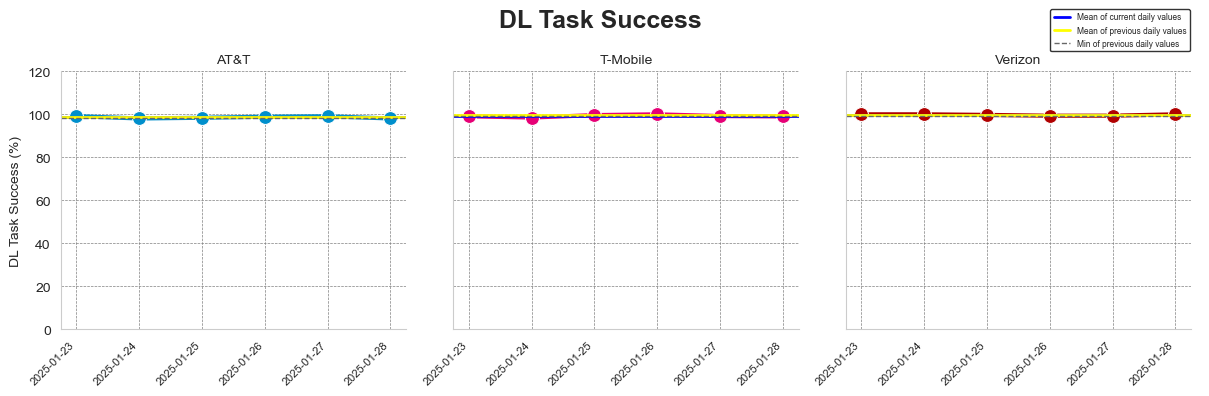

In [4980]:
# Prepare the data for the function call
mean_curr_vals = dl_all_task_curr.groupby('carrier')['avg_dl_task_curr'].mean().to_dict()
mean_comp_vals = dl_all_task_comp.groupby('carrier')['avg_dl_task_comp'].mean().to_dict()
min_vals = dl_task_comp.groupby('carrier')['avg_dl_task'].min().to_dict()

# Call the create_facet_grid function
create_facet_grid(
    data=dl_task_curr,
    y_col="avg_dl_task",
    num_col_wrap=num_col_wrap,
    mean_curr_vals=mean_curr_vals,
    mean_comp_vals=mean_comp_vals,
    max_vals=None,
    min_vals=min_vals,
    title="DL Task Success",
    y_label="DL Task Success (%)",
    save_path="dl_task_graph.png"
)

compute EOM table

In [4981]:
curr_test = dl_all_task_curr
comp_test = dl_all_task_comp
on_column = 'carrier'
drop_columns = []
measure_name = 'DL Task Success (%)'
curr_col = 'avg_dl_task_curr'
comp_col = 'avg_dl_task_comp'

# Process the data
dl_task_curr = process_eom_data(curr_test, comp_test, on_column, drop_columns, measure_name, curr_col, comp_col)

# Display the result
dl_task_curr.head()

,measure,carrier,current,comparison,delta,pct_change
0,DL Task Success (%),AT&T,98.61,98.93,-0.32,-0.32
1,DL Task Success (%),T-Mobile,99.23,99.71,-0.48,-0.48
2,DL Task Success (%),Verizon,99.75,99.83,-0.08,-0.08


In [4982]:
print("Notable Insights: \n*DL 5G \n*M2M block/drop \n*Median DL/UL throughput " \
"\n\nOther Observations: \n*Access success \n*Task Success rates " \
"\n\nData Exclusion/Tracking Items: \n*Excluded test(s) due to device issue: None \n*Other manual exclusions performed: None")

Notable Insights: 
*DL 5G 
*M2M block/drop 
*Median DL/UL throughput 

Other Observations: 
*Access success 
*Task Success rates 

Data Exclusion/Tracking Items: 
*Excluded test(s) due to device issue: None 
*Other manual exclusions performed: None


DQ Test Counts

In [4983]:
print("DQ Test Counts: ")

df_test_count.columns = df_test_count.iloc[0]
df_test_count = df_test_count.drop(0)

df_test_count = df_test_count.reset_index(drop=True)

df_test_count.head(len(df_test_count))



DQ Test Counts: 


,00,-------- DQ Test Counts --------,,,,
0,01,CorpusChristi-TX_2025-1H (CSID: 12705),,,,
1,02,,,,,
2,03,*****Total Test Count*****,Reportable,Valid,Invalid,Excluded Data
3,04,,22748,23415,0,667
4,05,,,,,
5,06,*****Report Set*****,Reportable,Valid,Invalid,Excluded Data
6,07,AT&T,5717,5845,0,128
7,07,Dish,5602,5882,0,280
8,07,T-Mobile,5714,5844,0,130
9,07,Verizon,5715,5844,0,129


In [4984]:
market_info = f'''select 
collection_set_id,
collection_set,
collection_type
from md2.vi_collection_sets
where collection_set_id = {curr_csid}
'''

market_info = pd.read_sql(market_info, con=os.getenv('RSR_SVC_CONN'))
market_info.head()

print(f"{country} Metro {market_info['collection_set'].iloc[0]} (CSID {curr_csid}) DQ Review")

US Metro CorpusChristi-TX_2025-1H (CSID 12705) DQ Review


In [4985]:
df_dl_5g_curr_html = df_dl_5g_curr.to_html(index=False, classes='table table-striped', border=0)
df_network_category_reshaped_html = df_network_category_reshaped.to_html(index=False, classes='table table-striped', border=0)
lte_rate_html  = lte_rate.to_html(index=False, classes='table table-striped', border=0)
volte_rate_html  = volte_rate.to_html(index=False, classes='table table-striped', border=0)
block_rate_html  = block_rate.to_html(index=False, classes='table table-striped', border=0)
drop_rate_html  = drop_rate.to_html(index=False, classes='table table-striped', border=0)
dl_tput_html  = dl_tput.to_html(index=False, classes='table table-striped', border=0)
ul_tput_html  = ul_tput.to_html(index=False, classes='table table-striped', border=0)
dl_acc_curr_html  = dl_acc_curr.to_html(index=False, classes='table table-striped', border=0)
dl_task_curr_html  = dl_task_curr.to_html(index=False, classes='table table-striped', border=0)
df_test_count_html = df_test_count.to_html(index=False, classes='table table-striped', border=0)


html_template = """
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>EOM table test</title>
    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.5.2/css/bootstrap.min.css">
    <style>
        .table-container {
            text-align: center;
        }
        .table-container .table {
            margin: auto;
            width: 50%; 
        }
    </style>
</head>
<body class="p-4">

    <h1 class="mb-4 text-center">{{ country }} Metro {{ collection_set }} (CSID {{ curr_csid }}) DQ Review</h1>
    <h2 class="text-center">DL Network Category</h2>
    <div class="table-container">
        <img src="dl_net_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ df_dl_5g_curr_html|safe }}</div>
    </div>
    <h2 class="text-center">Data Network Category (Download, Upload)</h2>
    <div class="table-container">
        <div class="table-responsive">{{ df_network_category_reshaped_html|safe }}</div>
    </div>
    <h2 class="text-center">Download Network Technology</h2>
    <div class="table-container">
        <img src="lte_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ lte_rate_html|safe }}</div>
    </div>
    <h2 class="text-center">M2M VoLTE/VoNR/EPS Fallback</h2>
    <div class="table-container">
        <img src="volte_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ volte_rate_html|safe }}</div>
    </div>
    <h2 class="text-center">Mobile-to-Mobile Call Block</h2>
    <div class="table-container">
        <img src="block_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ block_rate_html|safe }}</div>
    </div>
    <h2 class="text-center">Mobile-to-Mobile Call Drop</h2>
    <div class="table-container">
        <img src="drop_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ drop_rate_html|safe }}</div>
    </div>
    <h2 class="text-center">Download Throughput</h2>
    <div class="table-container">
        <img src="dl_tput_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ dl_tput_html|safe }}</div>
    </div>
    <h2 class="text-center">Upload Throughput</h2>
    <div class="table-container">
        <img src="ul_tput_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ ul_tput_html|safe }}</div>
    </div>
    <h2 class="text-center">Download Access Success</h2>
    <div class="table-container">
        <img src="dl_acc_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ dl_acc_curr_html|safe }}</div>
    </div>
    <h2 class="text-center">Download Task Success</h2>
    <div class="table-container">
        <img src="dl_task_graph.png" alt="Graph" class="img-fluid" style="max-width: 80%; height: auto;">
        <div class="table-responsive">{{ dl_task_curr_html|safe }}</div>
    </div>
    <div>
        <h3>Notable Insights:</h3>
        <ul>
            <li>DL 5G</li>
            <li>M2M block/drop</li>
        </ul>
    </div>

     <div>
        <h3>Other Observations:</h3>
        <ul>
            <li>Access success</li>
            <li>Task Success rates</li>
        </ul>
    </div>

     <div>
        <h3>Data Exclusion/Tracking Items: </h3>
        <ul>
            <li>Excluded test(s) due to device issue: None </li>
            <li>Other manual exclusions performed: None</li>
        </ul>
    </div>
    <h2 class="text-center">DQ Test Count</h2>
    <div class="table-container">
        <div class="table-responsive">{{ df_test_count_html|safe }}</div>
    </div>
</body>
</html>
"""

collection_set = market_info['collection_set'].iloc[0]

# Render 
template = Template(html_template)
rendered_html = template.render(
    country=country,
    collection_set=collection_set,
    curr_csid=curr_csid,
    df_dl_5g_curr_html = df_dl_5g_curr_html,
    df_network_category_reshaped_html = df_network_category_reshaped_html,
    lte_rate_html =lte_rate_html,
    volte_rate_html =volte_rate_html,
    block_rate_html =block_rate_html,
    drop_rate_html =drop_rate_html,
    dl_tput_html =dl_tput_html,
    ul_tput_html =ul_tput_html,
    dl_acc_curr_html =dl_acc_curr_html,
    dl_task_curr_html =dl_task_curr_html,
    df_test_count_html =df_test_count_html
    )

# Save to file
with open("dq_reporting.html", "w") as f:
    f.write(rendered_html)

# print("HTML page created: dq_reporting.html")

In [4986]:
# Get path
file_path = os.path.abspath("dq_reporting.html")  

# Check if the file exists
print(f"File path: {file_path}")
print(f"File exists: {os.path.exists(file_path)}")

# Open in default browser if the file exists
if os.path.exists(file_path):
    webbrowser.open(f"file://{file_path}")
else:
    print("Error: File not found.")


File path: /Users/jennymassari/Developer/projects/dq_reporting_test.py/dq_reporting.html
File exists: True
